In [1]:
from MRF import *
# import numpy as np
# import seaborn as sns

In [2]:
url='https://drive.google.com/file/d/1AG7oUfG03wH6-OPFm0sxdsAcutt2jdbn/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, index_col = "Unnamed: 0").reset_index(drop = True)

In [3]:
df.head(5).to_latex("/Users/ryanlucas/Desktop/CPI_factors.txt")

In [4]:
### Variable from FRED
my_var = "CPIAUCSL"
y_pos = df.columns.get_loc(my_var)

### Number of factors
my_k = 5

### First number of factors in linear eqn
my_x = 3

### Lags
my_p = 3

### Start Date
start_date = "2003-01-01"

### Forecast Horizon
hor = 3

In [5]:
r_list = []
np.random.seed(1234)

In [6]:
df

,CPIAUCSL,F_1,F_2,F_3,F_4,F_5,MAF_1,MAF_2,MAF_3,Trend
0,0.002158,1.173100,0.172975,-3.420704,-1.360721,-2.099334,-4.068628,4.708296,-13.407287,1
1,0.001604,2.049119,0.785785,-3.070974,-0.773570,-1.854451,-4.226717,3.971370,-13.633706,2
2,-0.002159,1.074777,-2.870071,-0.030658,-0.757934,-2.659571,-5.273620,3.157967,-12.326495,3
3,-0.000005,1.588660,-2.648067,-1.283088,0.118267,-1.761513,-6.650085,2.691071,-10.964577,4
4,-0.000538,1.728049,-3.852286,-1.425368,-4.038225,-0.612198,-8.065427,1.639973,-10.627529,5
...,...,...,...,...,...,...,...,...,...,...
214,0.004527,6.573487,0.558520,-1.655593,-0.277031,1.353771,-13.642200,-3.538902,0.349526,215
215,-0.001659,4.310718,-4.036972,0.715692,0.356950,1.844560,-14.189862,-3.868208,0.523730,216
216,-0.001233,2.242833,-5.167236,-1.266178,-0.248318,2.408852,-14.774730,-3.415055,1.471765,217
217,0.000695,5.047799,-0.255663,-1.987988,-2.788986,-1.383763,-14.420700,-3.849652,-0.119179,218


In [26]:
for i in range(1, hor + 1):
    
    if i == 1:
        Y_temp = df.append(df.iloc[-1]) 

        VAR_df = pd.DataFrame(df[my_var])

        for i in range(my_p, my_p + hor + 1):
            for column in df.columns:
                if column != 'Trend':
                    VAR_df[column + f".l{i}"] = df[column].shift(i)

display(Y_temp.iloc[6:])   
display(VAR_df.iloc[6:])



    # MRF = MacroRandomForest(data = df,
    #                         y_pos = y_pos,
    #                         x_pos = x_pos, 
    #                         B = 250, 
    #                         ridge_lambda=0.3,
    #                         parallelise = True,
    #                         n_cores = -1,
    #                         oos_pos = np.arange(len(df)- 1, len(df)),
    #                         trend_push = 6,
    #                         quantile_rate = 0.3, 
    #                         fast_rw = True)

,CPIAUCSL,F_1,F_2,F_3,F_4,F_5,MAF_1,MAF_2,MAF_3,Trend
6,-0.000547,-0.277600,-2.599226,-2.081060,-6.484645,-1.678355,-8.673332,0.917863,-12.202262,7.0
7,-0.002654,1.850762,-3.781645,-0.021495,-2.599912,-2.887458,-9.811923,0.157455,-12.158615,8.0
8,-0.000530,1.364588,-2.263825,-1.705314,-2.259512,-2.673253,-10.207873,0.824022,-11.301353,9.0
9,0.002638,2.498843,-1.044994,-2.520863,-2.597241,-2.359067,-10.524649,0.873661,-12.212273,10.0
10,0.002089,4.497013,0.894876,-3.366177,-2.509392,-3.468957,-11.187781,0.404875,-13.430177,11.0
...,...,...,...,...,...,...,...,...,...,...
215,-0.001659,4.310718,-4.036972,0.715692,0.356950,1.844560,-14.189862,-3.868208,0.523730,216.0
216,-0.001233,2.242833,-5.167236,-1.266178,-0.248318,2.408852,-14.774730,-3.415055,1.471765,217.0
217,0.000695,5.047799,-0.255663,-1.987988,-2.788986,-1.383763,-14.420700,-3.849652,-0.119179,218.0
218,0.001515,4.828376,-2.326178,-1.323269,-5.218885,1.243337,-15.922135,-5.035274,-0.226748,219.0


,CPIAUCSL,CPIAUCSL.l3,F_1.l3,F_2.l3,F_3.l3,F_4.l3,F_5.l3,MAF_1.l3,MAF_2.l3,MAF_3.l3,...,MAF_3.l5,CPIAUCSL.l6,F_1.l6,F_2.l6,F_3.l6,F_4.l6,F_5.l6,MAF_1.l6,MAF_2.l6,MAF_3.l6
6,-0.000547,-0.000005,1.588660,-2.648067,-1.283088,0.118267,-1.761513,-6.650085,2.691071,-10.964577,...,-13.633706,0.002158,1.173100,0.172975,-3.420704,-1.360721,-2.099334,-4.068628,4.708296,-13.407287
7,-0.002654,-0.000538,1.728049,-3.852286,-1.425368,-4.038225,-0.612198,-8.065427,1.639973,-10.627529,...,-12.326495,0.001604,2.049119,0.785785,-3.070974,-0.773570,-1.854451,-4.226717,3.971370,-13.633706
8,-0.000530,0.002658,3.827819,-1.402331,-1.445717,-5.231420,-1.899099,-8.841191,0.283879,-11.981698,...,-10.964577,-0.002159,1.074777,-2.870071,-0.030658,-0.757934,-2.659571,-5.273620,3.157967,-12.326495
9,0.002638,-0.000547,-0.277600,-2.599226,-2.081060,-6.484645,-1.678355,-8.673332,0.917863,-12.202262,...,-10.627529,-0.000005,1.588660,-2.648067,-1.283088,0.118267,-1.761513,-6.650085,2.691071,-10.964577
10,0.002089,-0.002654,1.850762,-3.781645,-0.021495,-2.599912,-2.887458,-9.811923,0.157455,-12.158615,...,-11.981698,-0.000538,1.728049,-3.852286,-1.425368,-4.038225,-0.612198,-8.065427,1.639973,-10.627529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.004527,-0.004208,3.699035,-5.197886,2.051645,1.783254,2.824103,-15.100229,-4.448299,2.187787,...,8.689134,0.000023,1.719626,-1.291863,-1.132730,-0.001003,-0.250286,-20.659944,-8.851346,12.531483
215,-0.001659,-0.001195,1.236135,-2.736347,-1.709994,0.919511,1.083672,-13.376538,-1.936633,2.074352,...,4.113429,0.000604,3.202482,-0.332627,-1.518130,1.080789,-0.384177,-18.672234,-5.521723,8.689134
216,-0.001233,0.000770,0.965055,-1.868591,-2.986870,0.174975,3.065051,-13.355309,-1.526074,3.113575,...,2.187787,0.001739,3.129887,-0.452622,-1.184449,0.458427,-0.399181,-15.619871,-3.132895,4.113429
217,0.000695,0.004527,6.573487,0.558520,-1.655593,-0.277031,1.353771,-13.642200,-3.538902,0.349526,...,2.074352,-0.004208,3.699035,-5.197886,2.051645,1.783254,2.824103,-15.100229,-4.448299,2.187787


In [8]:
MRF_output = MRF._ensemble_loop()

NameError: name 'MRF' is not defined

In [ ]:
pred = float(MRF_output['pred'].values)

In [ ]:
pred

0.0036527161575421736

In [ ]:
y = float(149629 * np.cumprod(np.exp(pred)) - 149629)

In [ ]:
y

547.551682574529

In [ ]:
d = [149629 * np.exp(float(value)) - 149629 for value in MRF_output['pred_ensemble']]

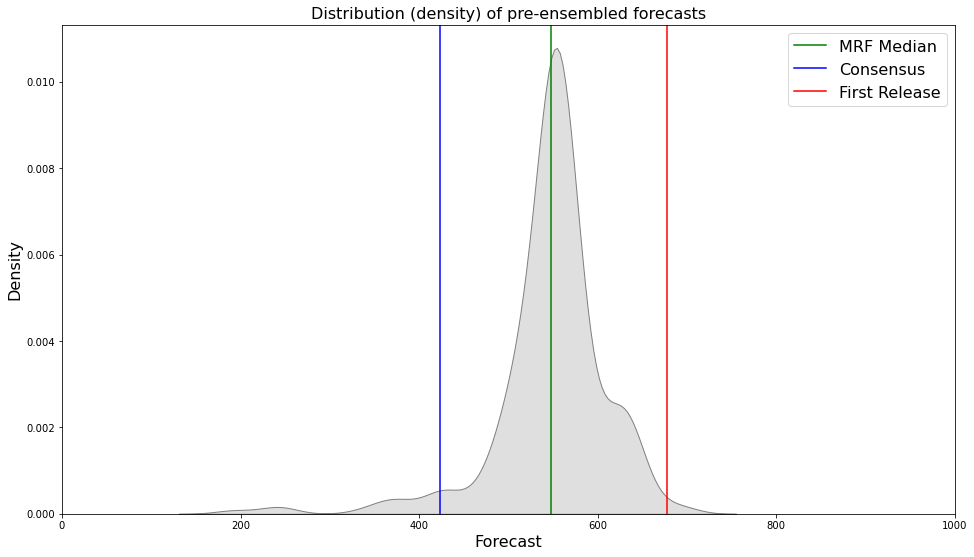

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(d, ax = ax, color = 'grey', shade = True)

fig.set_size_inches([16, 9])
ax.set_xlabel("Forecast", fontsize = 16)
ax.set_ylabel("Density", fontsize = 16)
ax.set_xlim([0, 1000])
ax.axvline(y, color = 'green', label = "MRF Median")
ax.axvline(423, color = 'blue', label = "Consensus")
ax.axvline(678, color = 'red', label = "First Release")
ax.set_title("Distribution (density) of pre-ensembled forecasts", fontsize = 16)
ax.legend(fontsize = 16)